<a href="https://colab.research.google.com/github/nicomurci/Taller-2-Nicolas-Castilo/blob/main/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='blue'>**TALLER 2 ~ MINE-4101: Ciencia de Datos Aplicada
Nicolás Adolfo Castillo Betancourt**</font>

<font color='blue'>**Docente: Fabian Camilo Peña**</font>

<font color='blue'>**IMPORTACIÓN DE LIBRERÍAS**</font>

La importación de estas bibliotecas permiten un flujo de trabajo completo para el análisis de datos, desde la carga y limpieza de datos con pandas hasta la visualización y exploración de datos con Matplotlib y Seaborn.


In [639]:
# Importando Librerias pandas, matplotlib.pyplot y seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [640]:
# Activando Opciones de visualización para el uso de la biblioteca pandas
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

<font color='blue'>**DATA INSPECTION**</font>

In [641]:
# Leyendo archivo csv principal "gapminder_final"
Gapminder = pd.read_csv("./sample_data/gapminder_final.csv")

In [642]:
# Obteniendo dimensiones del dataframe de Gapminder
Gapminder.shape

(178, 16)

In [643]:
# Encontrando las filas con valores duplicados en la columna "country"
paises_duplicados = Gapminder[Gapminder['country'].duplicated(keep=False)]['country']
# Imprimiendo los países duplicados
print("Países con valores duplicados en la columna 'country':")
print(paises_duplicados)


Países con valores duplicados en la columna 'country':
0             Ireland
5         Switzerland
7                Oman
18     Macedonia, FYR
25          Lithuania
27            Belarus
32        Switzerland
39               Oman
52            Vietnam
67           Malaysia
74     Macedonia, FYR
97         Luxembourg
98              Sudan
111             Sudan
114        Tajikistan
116              Iran
120          Malaysia
124              Iran
143         Lithuania
148           Belarus
149           Vietnam
155           Ireland
156        Tajikistan
166        Luxembourg
Name: country, dtype: object


<font color='blue'>**ANÁLISIS TÉCNICO**</font>

La eliminación de duplicados se lleva a cabo previo a la división de los datos (Train - Test) con el fin de mitigar el riesgo de sobreajuste para el modelo y adicionalmente, prevenir potenciales sesgos.

In [644]:
# Eliminando filas duplicadas en función de la columna "country"
Gapminder = Gapminder.drop_duplicates(subset='country', keep='first')

In [645]:
# Obteniendo un resumen estadístico de todas las columnas numéricas del DataFrame
Gapminder.describe()

,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
count,163.000000,166.000000,162.000000,165.000000,1.640000e+02,165.000000,144.000000,163.000000,166.000000,61.000000,156.000000,130.000000,166.000000,165.000000,166.000000
mean,7202.019107,6.663795,1.359531,37.449697,6.056342e+09,47.941212,1.969792,33.652136,69.103886,1.462429,3.692308,1191.261478,9.825928,59.189091,55.936506
std,10469.295971,5.026471,1.516373,23.035581,2.830486e+10,14.779047,4.415607,27.933161,9.976511,1.851035,6.283224,1709.387805,6.303428,10.357376,22.844257
min,103.775857,0.030000,0.000000,3.900000,8.506667e+05,12.400000,0.060000,0.210066,47.794000,0.032281,-10.000000,0.000000,0.201449,34.900002,10.400000
25%,602.502870,2.445000,0.476071,20.600000,7.819350e+07,39.200001,0.100000,9.102256,62.467500,0.504659,-2.000000,215.286576,5.666852,52.099998,36.840000
50%,2344.896916,5.920000,0.917066,29.800000,2.803772e+08,48.400002,0.400000,28.731883,72.974000,0.890813,6.000000,597.136436,8.943233,58.900002,57.610000
75%,8550.031767,9.742500,1.572321,50.100000,2.391801e+09,56.200001,1.325000,52.513403,76.127500,1.593223,9.000000,1493.321928,12.409866,65.000000,73.475000
max,52301.587180,23.010000,9.820127,101.100000,3.340000e+11,83.300003,25.900000,95.638113,83.394000,12.228645,10.000000,11154.755030,35.752872,83.199997,100.000000


In [646]:
# Obteniendo las nuevas dimensiones del dataframe de Gapminder despues de la eliminación de duplicados
Gapminder.shape

(166, 16)

In [647]:
# Escaneo básico del tipo de datos que contiene el DataFrame, analizando su estructura y contenido
print(Gapminder.head())

                country  incomeperperson  alcconsumption  armedforcesrate  \
0               Ireland     27595.091350           14.92         0.450024   
1               Albania      1914.996551            7.29         1.024736   
2  Central African Rep.       239.518749            3.17         0.148659   
3              Barbados      9243.587053            6.42         0.663956   
4                 Italy     18982.269290            9.72         1.729346   

   breastcancerper100th  co2emissions  femaleemployrate  hivrate  \
0                  74.9  1.633779e+09         51.000000      0.2   
1                  57.4  2.237473e+08         42.099998      NaN   
2                  16.5  8.338000e+06         62.900002      4.7   
3                  62.5  3.616067e+07         60.299999      1.4   
4                  74.4  1.900045e+10         35.799999      0.3   

   internetuserate  lifeexpectancy  oilperperson  polityscore  \
0        69.770394          80.557      1.700262         10.0  

In [648]:
# Identificando columnas con valores nulos y validando los tipos de datos de cada feature
Gapminder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               166 non-null    object 
 1   incomeperperson       163 non-null    float64
 2   alcconsumption        166 non-null    float64
 3   armedforcesrate       162 non-null    float64
 4   breastcancerper100th  165 non-null    float64
 5   co2emissions          164 non-null    float64
 6   femaleemployrate      165 non-null    float64
 7   hivrate               144 non-null    float64
 8   internetuserate       163 non-null    float64
 9   lifeexpectancy        166 non-null    float64
 10  oilperperson          61 non-null     float64
 11  polityscore           156 non-null    float64
 12  relectricperperson    130 non-null    float64
 13  suicideper100th       166 non-null    float64
 14  employrate            165 non-null    float64
 15  urbanrate             1

In [649]:
# Validando cantidad de valores nulos o faltantes del DataFrame
Gapminder.isnull().sum()

country                   0
incomeperperson           3
alcconsumption            0
armedforcesrate           4
breastcancerper100th      1
co2emissions              2
femaleemployrate          1
hivrate                  22
internetuserate           3
lifeexpectancy            0
oilperperson            105
polityscore              10
relectricperperson       36
suicideper100th           0
employrate                1
urbanrate                 0
dtype: int64

<font color='blue'>**Verificación Porcentaje de valores Nulos en el Dataframe [Gráfico #1]**</font>

A través del siguiente gráfico se busca validar la cantidad de features que cuentan con datos nulos y adicionalmente, se busca verificar su proporción sobre el dataframe para considerar procesos futuros de imputación.

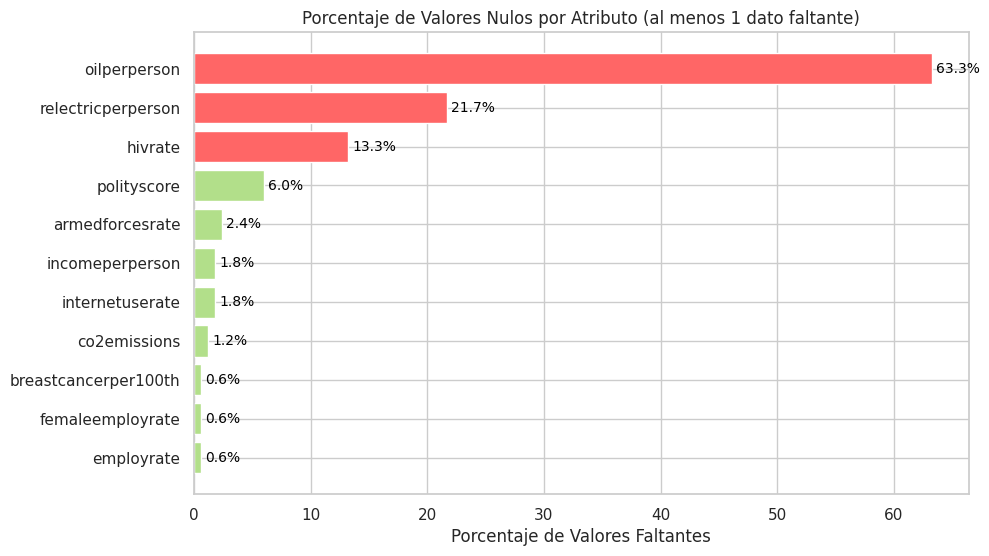

In [650]:
# Filtra las columnas que tienen al menos un valor faltante
columns_with_missing_values = Gapminder.columns[Gapminder.isnull().any()]
missing_percent = (Gapminder[columns_with_missing_values].isnull().sum() / len(Gapminder)) * 100
missing_data = pd.DataFrame({'Atributo con Valores Faltantes': columns_with_missing_values, 'Porcentaje de Valores Faltantes': missing_percent})
missing_data = missing_data.sort_values(by='Porcentaje de Valores Faltantes', ascending=False)
color_red = '#FF6666'  # Rojo
color_green = '#B2DF8A'  # Verde
colors = [color_green if p < 10 else color_red for p in missing_data['Porcentaje de Valores Faltantes']]
plt.figure(figsize=(10, 6))
bars = plt.barh(missing_data['Atributo con Valores Faltantes'], missing_data['Porcentaje de Valores Faltantes'], color=colors)
plt.xlabel('Porcentaje de Valores Faltantes')
plt.title('Porcentaje de Valores Nulos por Atributo (al menos 1 dato faltante)')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.1f}%',                      # Texto de la etiqueta
                 xy=(width, bar.get_y() + bar.get_height() / 2),  # Posición de la etiqueta
                 xytext=(3, 0),                             # Desplazamiento de la etiqueta
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

plt.show()

<font color='green'>**Con base en la fuente oficial de datos de Gapminder (https://www.gapminder.org/data/), se explora la posibilidad de obtener información adicional para la feature 'oilperperson' con el propósito de mejorar la integridad de los datos y enriquecer la disponibilidad de información.**</font>

In [651]:
# Verificando cantidad de datos Nulos para oilperperson
oilperperson_null_count = Gapminder['oilperperson'].isnull().sum()
print("Actual cantidad de datos nulos en 'oilperperson':", oilperperson_null_count)

Actual cantidad de datos nulos en 'oilperperson': 105


In [652]:
# Filtrando los paises donde "oilperperson" es vacio
paises_con_oilperperson_vacios = Gapminder[Gapminder['oilperperson'].isna()]['country']
print(paises_con_oilperperson_vacios)

1                   Albania
2      Central African Rep.
3                  Barbados
6                Mauritania
7                      Oman
               ...         
171                    Laos
172                  Latvia
174               Mauritius
175                 Namibia
176                 Comoros
Name: country, Length: 105, dtype: object


In [653]:
# Leyendo archivo CSV secundario con información oficial de la pagina GAPMINDER para posteriormente imputarlos
second_Gapminder = pd.read_csv("./sample_data/oil_consumption_per_cap_2010.csv", delimiter=';')
# Muestra los primeros 5 datos del DataFrame "second_Gapminder"
print(second_Gapminder.head(5))


      country oilperperson
0         UAE         3,66
1   Argentina        0,672
2   Australia         1,88
3     Austria         1,51
4  Azerbaijan        0,361


In [654]:
# Creando un diccionario que mapee los países a sus valores de "oilperperson" en "second_Gapminder"
oilperperson_mapping = second_Gapminder.set_index('country')['oilperperson'].to_dict()
# Completa los valores faltantes en "Gapminder" sin sobrescribir los datos existentes
Gapminder['oilperperson'] = Gapminder['oilperperson'].fillna(Gapminder['country'].map(oilperperson_mapping))

In [655]:
# Comprobando nuevamente la cantidad de datos Nulos para oilperperson, esta vez posterior a la imputación
oilperperson_null_count = Gapminder['oilperperson'].isnull().sum()
print("Cantidad actual de datos nulos para 'oilperperson':", oilperperson_null_count)

Cantidad actual de datos nulos para 'oilperperson': 90


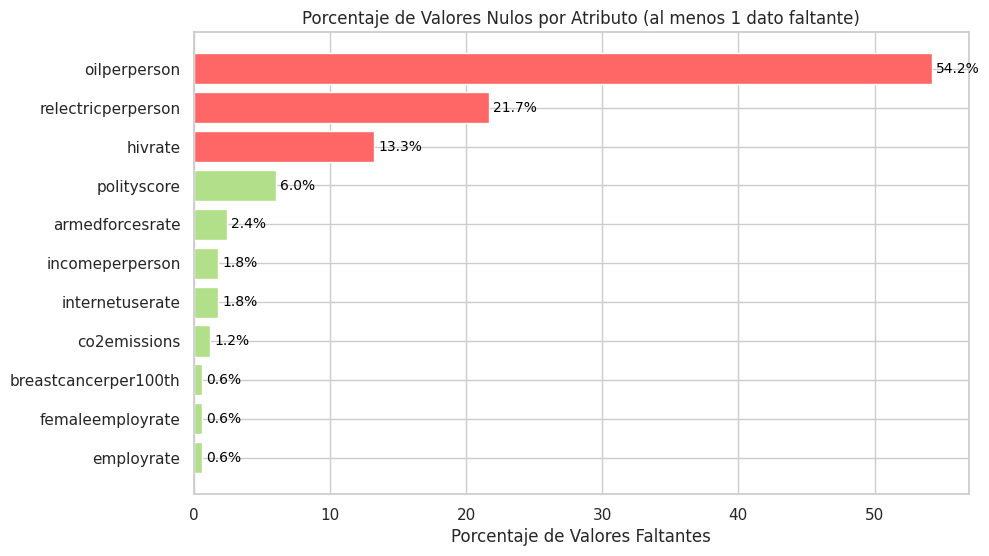

In [656]:
# Filtra las columnas que tienen al menos un valor faltante
columns_with_missing_values = Gapminder.columns[Gapminder.isnull().any()]
missing_percent = (Gapminder[columns_with_missing_values].isnull().sum() / len(Gapminder)) * 100
missing_data = pd.DataFrame({'Atributo con Valores Faltantes': columns_with_missing_values, 'Porcentaje de Valores Faltantes': missing_percent})
missing_data = missing_data.sort_values(by='Porcentaje de Valores Faltantes', ascending=False)
color_red = '#FF6666'  # Rojo
color_green = '#B2DF8A'  # Verde
colors = [color_green if p < 10 else color_red for p in missing_data['Porcentaje de Valores Faltantes']]
plt.figure(figsize=(10, 6))
bars = plt.barh(missing_data['Atributo con Valores Faltantes'], missing_data['Porcentaje de Valores Faltantes'], color=colors)
plt.xlabel('Porcentaje de Valores Faltantes')
plt.title('Porcentaje de Valores Nulos por Atributo (al menos 1 dato faltante)')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.annotate(f'{width:.1f}%',                      # Texto de la etiqueta
                 xy=(width, bar.get_y() + bar.get_height() / 2),  # Posición de la etiqueta
                 xytext=(3, 0),                             # Desplazamiento de la etiqueta
                 textcoords='offset points',
                 ha='left', va='center', fontsize=10, color='black')

plt.show()

<font color='blue'>**ANÁLISIS TÉCNICO**</font>

Con base en los anteriores procedimientos y análisis, se logró una notable mejora del 14.28% en la integridad de los datos asociados a la característica "oilperperson". No obstante, es crucial destacar que el porcentaje de datos nulos en dicha característica aún se mantiene significativamente alto (54.22%).

Dada esta situación se plantea un dilema en la consideración de eliminar esta feature en el presente proyecto de ciencia de datos, a pesar de su importancia intrínseca. De manera similar para la característica "relectricperperson" que presenta un nivel sustancial de datos nulos (21.7%).

Es imperativo reconocer que NO todos los países dependen de una economía basada en el petróleo, y la decisión de eliminación de estas features se fundamenta en la necesidad de preservar la calidad y confiabilidad de los análisis y resultados que se derivarán de este proyecto, Incluso si eso significa dejar de usar características que podrían haber sido útiles y valiosas para el análisis.

In [657]:
# Eliminación de las columnas 'oilperperson' y 'relectricperperson' del dataframe
columns_to_drop = ['oilperperson', 'relectricperperson']
Gapminder = Gapminder.drop(columns=columns_to_drop)

In [658]:
Gapminder.shape

(166, 14)

In [659]:
# Validando cantidad de valores nulos o faltantes del DataFrame
Gapminder.isnull().sum()

country                  0
incomeperperson          3
alcconsumption           0
armedforcesrate          4
breastcancerper100th     1
co2emissions             2
femaleemployrate         1
hivrate                 22
internetuserate          3
lifeexpectancy           0
polityscore             10
suicideper100th          0
employrate               1
urbanrate                0
dtype: int64

<font color='blue'>**GRÁFICO DE CORRELACIÓN**</font>


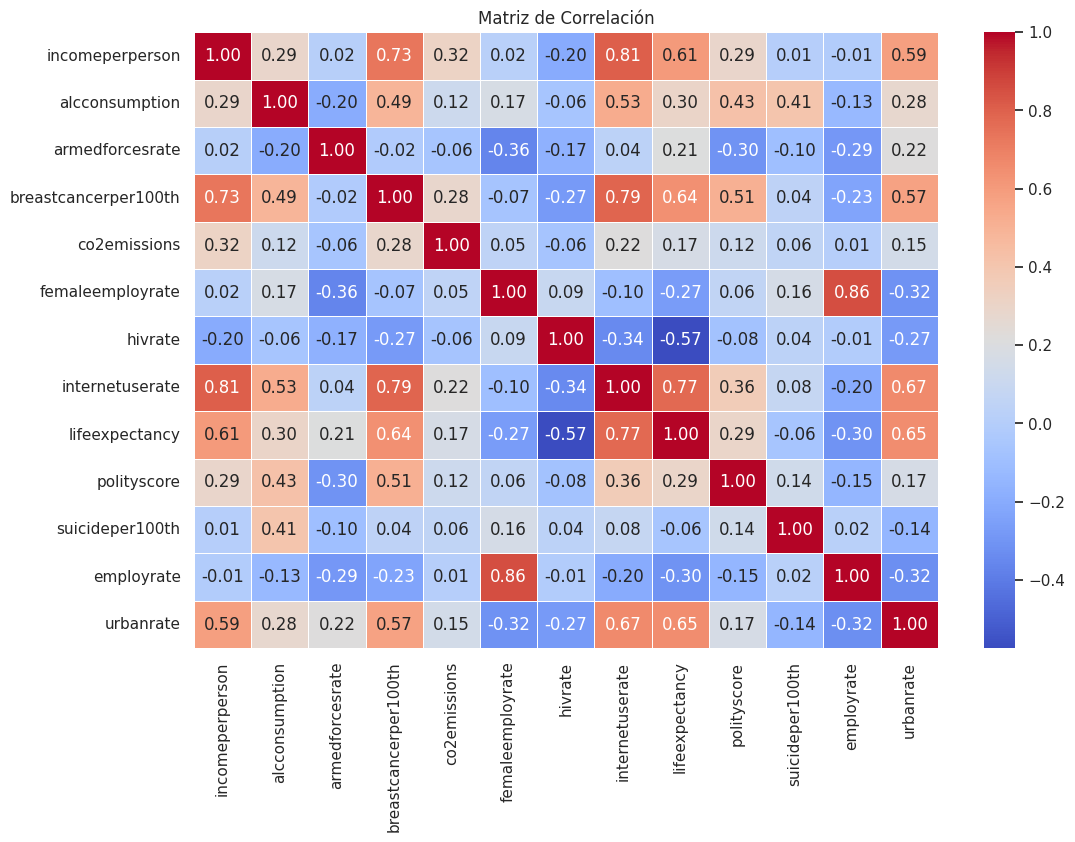

In [660]:
# Características que se incluirán en el gráfico de correlación
features = ['incomeperperson', 'alcconsumption', 'armedforcesrate',
            'breastcancerper100th', 'co2emissions', 'femaleemployrate',
            'hivrate', 'internetuserate', 'lifeexpectancy', 'polityscore',
            'suicideper100th', 'employrate', 'urbanrate']
correlation_matrix = Gapminder[features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

In [661]:
# Calculando la matriz de correlación
correlation_matrix = Gapminder.corr()

# Calculando la correlación del PIB con todas las demás variables
correlation_with_income = correlation_matrix['incomeperperson'].sort_values(ascending=False)
print(correlation_with_income)

incomeperperson         1.000000
internetuserate         0.808128
breastcancerper100th    0.730466
lifeexpectancy          0.606281
urbanrate               0.585350
co2emissions            0.316875
alcconsumption          0.291129
polityscore             0.287579
femaleemployrate        0.019218
armedforcesrate         0.015255
suicideper100th         0.005159
employrate             -0.011747
hivrate                -0.201640
Name: incomeperperson, dtype: float64


<ipython-input-661-4fc57c20d06e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Gapminder.corr()


<font color='blue'>**ANÁLISIS TÉCNICO Y DE NEGOCIO**</font>

Según la matriz de correlación evidenciada anteriormente, se pueden obtener las siguientes conclusiones:

La variable "incomeperperson" muestra una fuerte correlación positiva con "internetuserate" (0.808), "breastcancerper100th" (0.730), y "lifeexpectancy" (0.606). Esto sugiere que a medida que aumenta el ingreso per cápita, también tienden a aumentar las tasas de usuarios de internet, las tasas de cáncer de mama por cada 100 personas y la esperanza de vida.
Finalmente, "urbanrate" muestra una correlación positiva moderada con "incomeperperson" (0.585) y otras variables, lo que indica que la urbanización puede estar relacionada con un mayor ingreso per cápita y otros factores.

<font color='green'>**ANÁLISIS UNIVARIADO**</font>

<font color='red'>**1-ANÁLISIS "incomeperperson"**</font>

In [662]:
# Calculando las estadísticas descriptivas básicas
summary_stats = Gapminder['incomeperperson'].describe()
print(summary_stats)

count      163.000000
mean      7202.019107
std      10469.295971
min        103.775857
25%        602.502870
50%       2344.896916
75%       8550.031767
max      52301.587180
Name: incomeperperson, dtype: float64


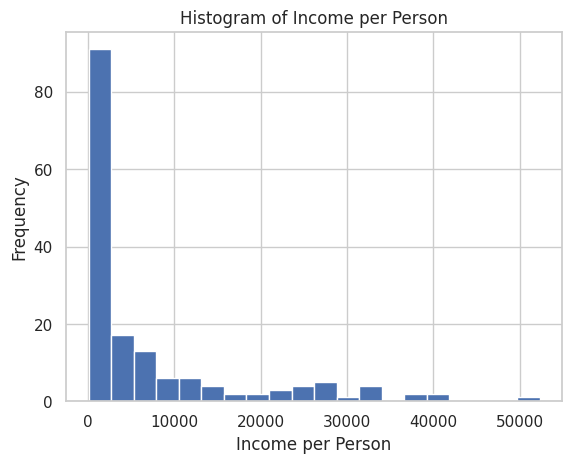

In [663]:
# Creando un histograma incomeperperson
plt.hist(Gapminder['incomeperperson'], bins=20)
plt.xlabel('Income per Person')
plt.ylabel('Frequency')
plt.title('Histogram of Income per Person')
plt.show()

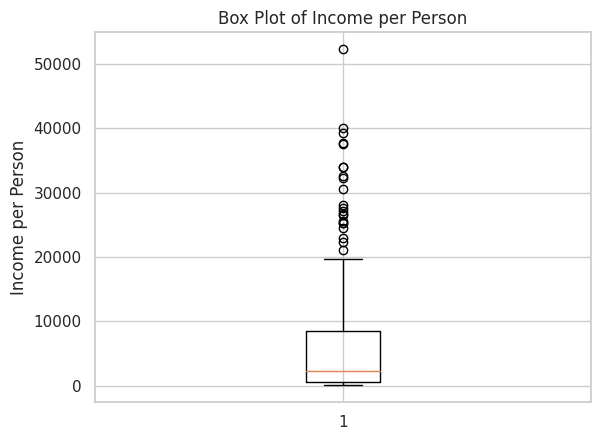

In [664]:
#Box plot incomeperperson
import matplotlib.pyplot as plt
# Eliminar filas con valores faltantes en la columna 'incomeperperson'
cleaned_data = Gapminder.dropna(subset=['incomeperperson'])

# Crear un diagrama de caja con los datos limpios
plt.boxplot(cleaned_data['incomeperperson'])
plt.ylabel('Income per Person')
plt.title('Box Plot of Income per Person')
plt.show()

In [665]:
# Encuentra el índice del país con el ingreso per cápita más alto
indice_max_income = Gapminder['incomeperperson'].idxmax()
# Accede al país correspondiente utilizando el índice
pais_con_ingreso_mas_alto = Gapminder.loc[indice_max_income, 'country']
# Imprime el país con el ingreso per cápita más alto
print(f'El país con el ingreso per cápita más alto es: {pais_con_ingreso_mas_alto}')

El país con el ingreso per cápita más alto es: Luxembourg


In [666]:
# Encontrando el índice de la fila que contiene 'Luxembourg' en la columna 'country'
indice_a_eliminar = Gapminder[Gapminder['country'] == 'Luxembourg'].index
# Utiliza 'drop' para eliminar la fila con el índice encontrado
Gapminder = Gapminder.drop(indice_a_eliminar)

<font color='red'>**2-ANÁLISIS "Internetuserate"**</font>

In [667]:
# Calculando las estadísticas descriptivas básicas
summary_stats = Gapminder['internetuserate'].describe()
print(summary_stats)

count    162.000000
mean      33.303819
std       27.662412
min        0.210066
25%        9.054996
50%       28.580958
75%       51.980092
max       95.638113
Name: internetuserate, dtype: float64


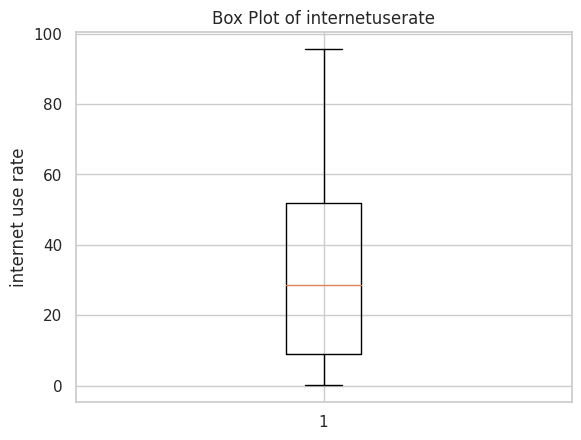

In [668]:
# Box plot internetuserate
import matplotlib.pyplot as plt
# Eliminar filas con valores faltantes en la columna 'incomeperperson'
cleaned_data = Gapminder.dropna(subset=['internetuserate'])

# Crear un diagrama de caja con los datos limpios
plt.boxplot(cleaned_data['internetuserate'])
plt.ylabel('internet use rate')
plt.title('Box Plot of internetuserate')
plt.show()


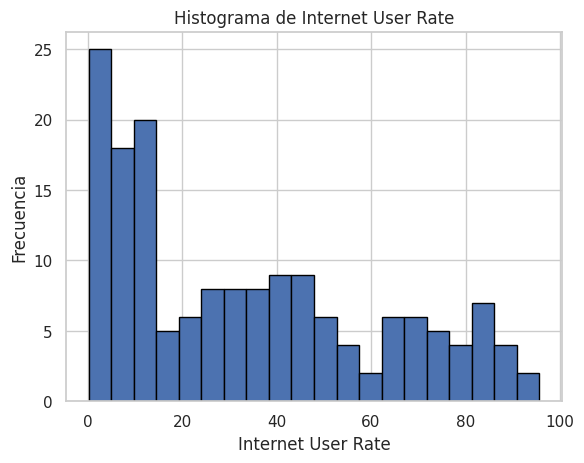

In [669]:
# Histograma internetuserate
import matplotlib.pyplot as plt
# Crear un histograma para la variable 'Internetuserate'
plt.hist(Gapminder['internetuserate'], bins=20, edgecolor='black')
plt.xlabel('Internet User Rate')
plt.ylabel('Frecuencia')
plt.title('Histograma de Internet User Rate')
plt.show()

<font color='red'>**3-ANÁLISIS "breastcancerper100th"**</font>

In [670]:
# Calculando las estadísticas descriptivas básicas
summary_stats = Gapminder['breastcancerper100th'].describe()
print(summary_stats)

count    164.00000
mean      37.17500
std       22.83345
min        3.90000
25%       20.55000
50%       29.80000
75%       49.72500
max      101.10000
Name: breastcancerper100th, dtype: float64


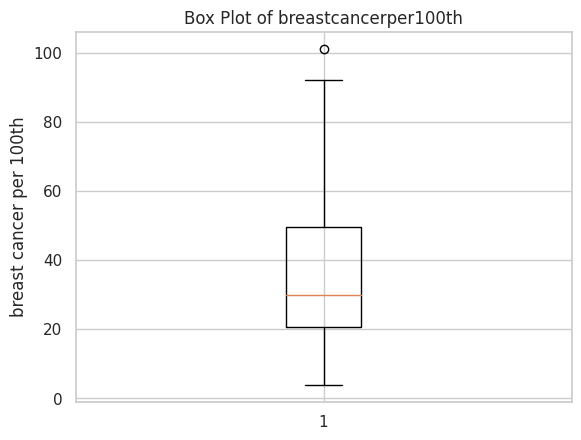

In [671]:
# Box plot breastcancerper100th
import matplotlib.pyplot as plt
# Eliminar filas con valores faltantes en la columna 'incomeperperson'
cleaned_data = Gapminder.dropna(subset=['breastcancerper100th'])
# Crear un diagrama de caja con los datos limpios
plt.boxplot(cleaned_data['breastcancerper100th'])
plt.ylabel('breast cancer per 100th')
plt.title('Box Plot of breastcancerper100th')
plt.show()

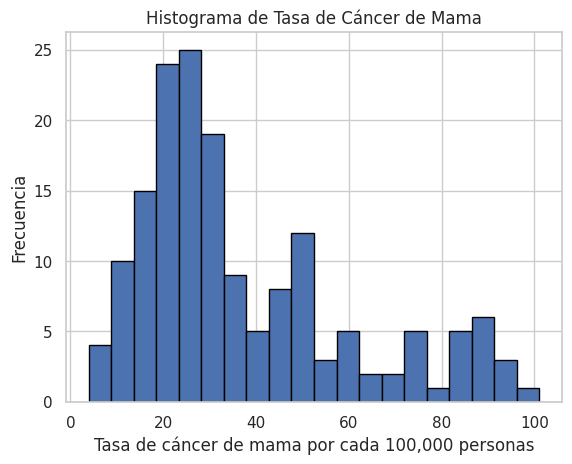

In [672]:
# Histograma breastcancerper100th
import matplotlib.pyplot as plt
# Crear un histograma para la variable 'breastcancerper100th'
plt.hist(Gapminder['breastcancerper100th'], bins=20, edgecolor='black')
plt.xlabel('Tasa de cáncer de mama por cada 100,000 personas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa de Cáncer de Mama')
plt.show()

<font color='red'>**4-ANÁLISIS "lifeexpectancy"**</font>

In [673]:
# Calculando las estadísticas descriptivas básicas
summary_stats = Gapminder['lifeexpectancy'].describe()
print(summary_stats)

count    165.000000
mean      69.038073
std        9.970672
min       47.794000
25%       62.465000
50%       72.974000
75%       76.126000
max       83.394000
Name: lifeexpectancy, dtype: float64


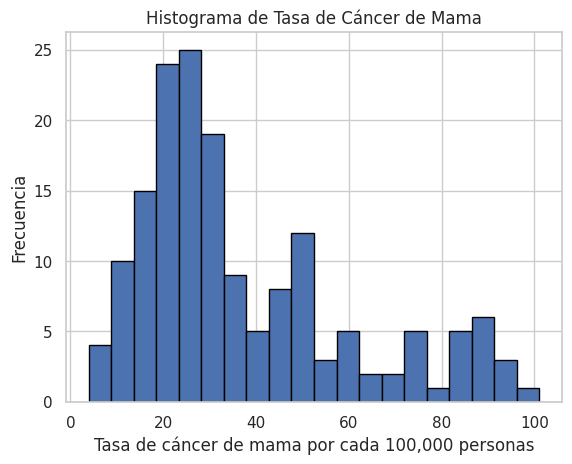

In [674]:
# histograma breastcancerper100th
import matplotlib.pyplot as plt

# Crear un histograma para la variable 'breastcancerper100th'
plt.hist(Gapminder['breastcancerper100th'], bins=20, edgecolor='black')
plt.xlabel('Tasa de cáncer de mama por cada 100,000 personas')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa de Cáncer de Mama')
plt.show()

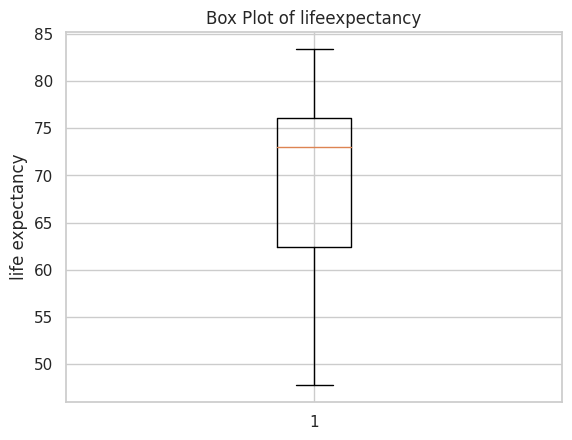

In [675]:
# boxplot lifeexpectancy
import matplotlib.pyplot as plt
# Eliminar filas con valores faltantes en la columna 'incomeperperson'
cleaned_data = Gapminder.dropna(subset=['lifeexpectancy'])
# Crear un diagrama de caja con los datos limpios
plt.boxplot(cleaned_data['lifeexpectancy'])
plt.ylabel('life expectancy')
plt.title('Box Plot of lifeexpectancy')
plt.show()

<font color='red'>**5-ANÁLISIS "urbanrate"**</font>

In [676]:
# Calculando las estadísticas descriptivas básicas
summary_stats = Gapminder['urbanrate'].describe()
print(summary_stats)

count    165.000000
mean      55.775879
std       22.819576
min       10.400000
25%       36.840000
50%       57.280000
75%       73.460000
max      100.000000
Name: urbanrate, dtype: float64


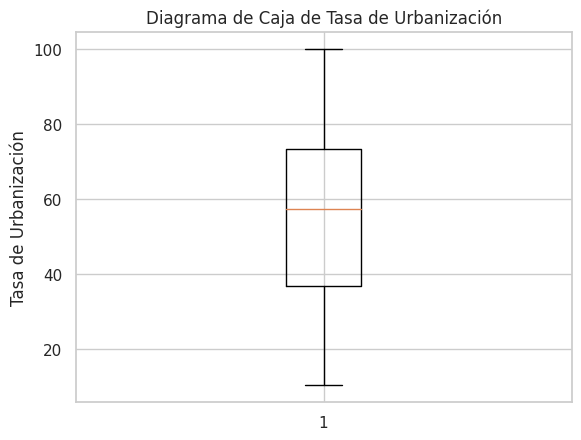

In [677]:
# Boxplot urbanrate
import matplotlib.pyplot as plt
# Eliminar filas con valores faltantes en la columna 'urbanrate'
cleaned_data = Gapminder.dropna(subset=['urbanrate'])

# Crear un diagrama de caja con los datos limpios, mostrando los valores atípicos
plt.boxplot(cleaned_data['urbanrate'], showfliers=True)
plt.ylabel('Tasa de Urbanización')
plt.title('Diagrama de Caja de Tasa de Urbanización')
plt.show()

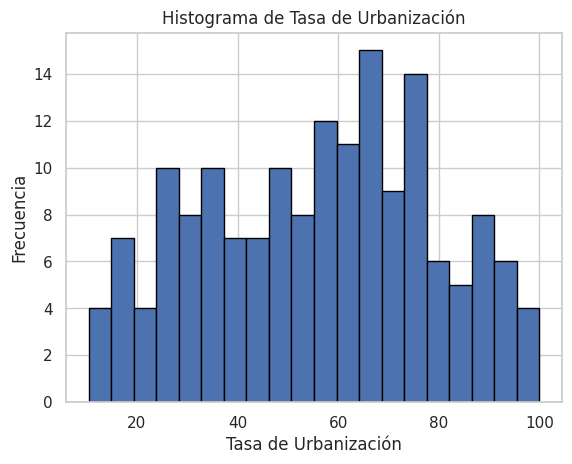

In [678]:
# Histograma urbanrate
import matplotlib.pyplot as plt
# Eliminar filas con valores faltantes en la columna 'urbanrate'
cleaned_data = Gapminder.dropna(subset=['urbanrate'])
# Crear un histograma para la variable 'urbanrate'
plt.hist(cleaned_data['urbanrate'], bins=20, edgecolor='black')
plt.xlabel('Tasa de Urbanización')
plt.ylabel('Frecuencia')
plt.title('Histograma de Tasa de Urbanización')
plt.show()

<font color='green'>**ANÁLISIS MULTIVARIADO**</font>

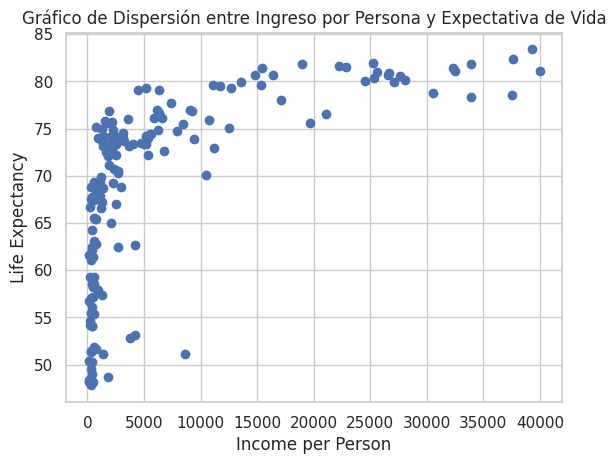

In [679]:
# Gráfico incomeperperson vs lifeexpectancy
X = Gapminder['incomeperperson']
y = Gapminder['lifeexpectancy']

# Crea un gráfico de dispersión
plt.scatter(X, y)
plt.xlabel('Income per Person')
plt.ylabel('Life Expectancy')
plt.title('Gráfico de Dispersión entre Ingreso por Persona y Expectativa de Vida')
plt.show()


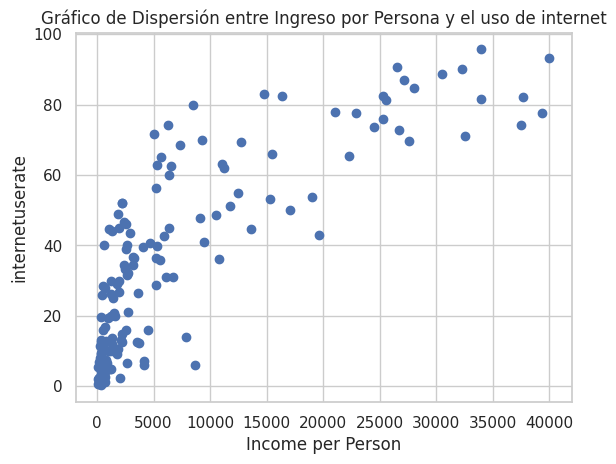

In [680]:
# Gráfico incomeperperson vs internetuserate
X = Gapminder['incomeperperson']
y = Gapminder['internetuserate']

# Crea un gráfico de dispersión
plt.scatter(X, y)
plt.xlabel('Income per Person')
plt.ylabel('internetuserate')
plt.title('Gráfico de Dispersión entre Ingreso por Persona y el uso de internet')
plt.show()

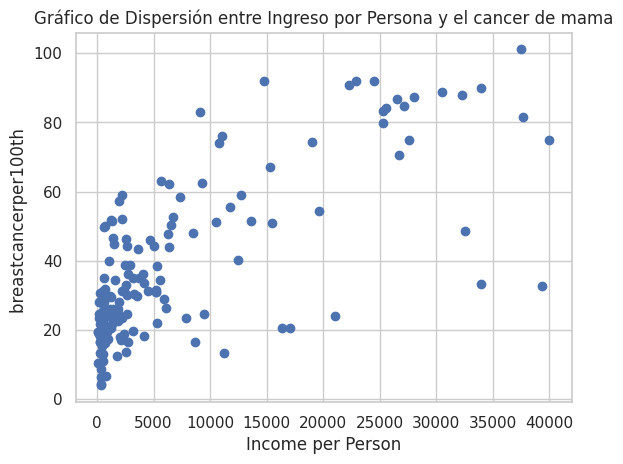

In [681]:
# Gráfico incomeperperson vs breastcancerper100th
X = Gapminder['incomeperperson']
y = Gapminder['breastcancerper100th']

# Crea un gráfico de dispersión
plt.scatter(X, y)
plt.xlabel('Income per Person')
plt.ylabel('breastcancerper100th ')
plt.title('Gráfico de Dispersión entre Ingreso por Persona y el cancer de mama')
plt.show()

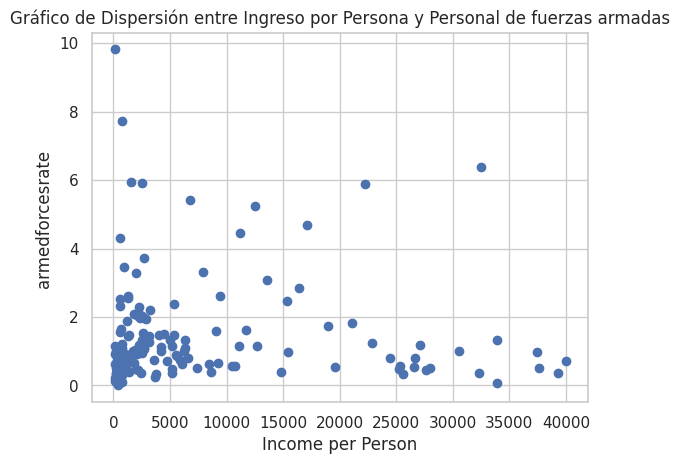

In [682]:
# Gráfico incomeperperson vs armedforcesrate
X = Gapminder['incomeperperson']
y = Gapminder['armedforcesrate']

# Crea un gráfico de dispersión
plt.scatter(X, y)
plt.xlabel('Income per Person')
plt.ylabel('armedforcesrate ')
plt.title('Gráfico de Dispersión entre Ingreso por Persona y Personal de fuerzas armadas')
plt.show()

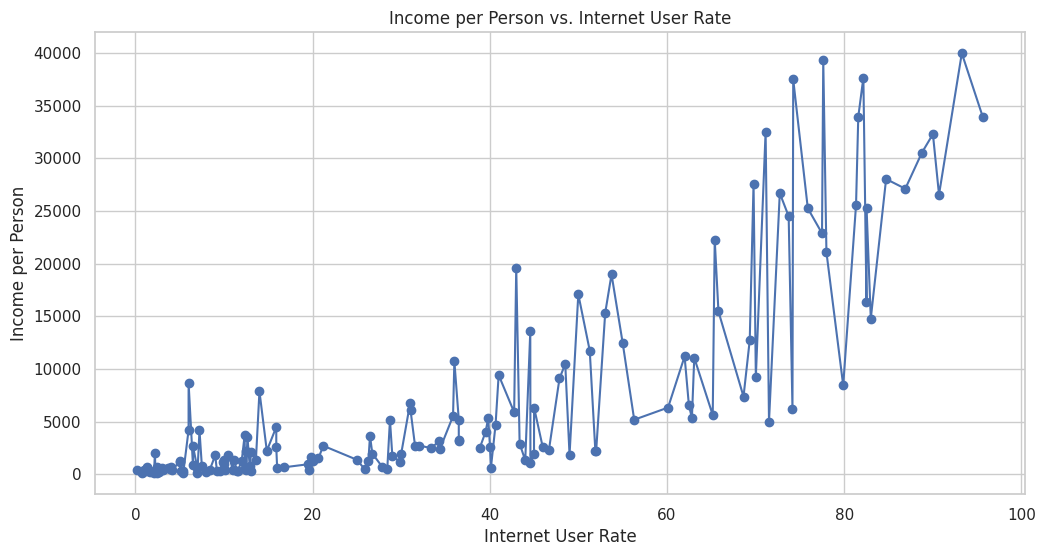

In [683]:
# Gráfico de Líneas (Mostrar tendencia)
# Este gráfico de líneas muestra la relación entre "incomeperperson" y "internetuserate" a medida que aumenta la tasa de usuarios de Internet.
import matplotlib.pyplot as plt
# Ordenar los datos por internetuserate
sorted_data = Gapminder.sort_values('internetuserate')
# Gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(sorted_data['internetuserate'], sorted_data['incomeperperson'], marker='o', linestyle='-', markersize=6)
plt.xlabel('Internet User Rate')
plt.ylabel('Income per Person')
plt.title('Income per Person vs. Internet User Rate')
plt.grid(True)
plt.show()



<font color='red'>**SPLIT 80 - 20**</font>

A continuación se realiza un split 80% - 20% de los datos, para entrenar y evaluar el rendimiento del modelo de regresión de manera efectiva, asegurando que el modelo sea capaz de hacer predicciones precisas en datos no vistos previamente.

In [684]:
# Fraccionando los datos en 80% de entrenamiento y 20% de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Gapminder.drop(columns=['incomeperperson']), Gapminder['incomeperperson'], test_size=0.2, random_state=42)
# X_train y y_train -> Conjuntos de entrenamiento (80%)
# X_test y y_test -> Conjuntos de prueba (20%)

In [685]:
# Verificando longitudes
print("Longitud de X_train:", len(X_train))
print("Longitud de X_test:", len(X_test))
print("Longitud de y_train:", len(y_train))
print("Longitud de y_test:", len(y_test))

Longitud de X_train: 132
Longitud de X_test: 33
Longitud de y_train: 132
Longitud de y_test: 33


<font color='blue'>**DESPUES DEL SPLIT**</font>

Considerando el [Gráfico #1] presentado a lo largo de este notebook se evidencia que el porcentaje de valores nulos en las características resaltadas en color verde es menor al 7%, por esta razón se ha optado por aplicar la técnica de imputación por media para completar los datos faltantes.

In [686]:
X_train.describe()

,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,suicideper100th,employrate,urbanrate
count,132.000000,129.000000,131.000000,1.300000e+02,131.000000,115.000000,129.000000,132.000000,125.000000,132.000000,131.000000,132.000000
mean,6.247955,1.392167,35.693130,6.635964e+09,47.040458,2.025739,31.722122,68.379189,3.016000,9.806263,58.586260,55.150758
std,5.003358,1.453271,22.072779,3.115796e+10,15.294573,4.655928,27.202952,10.110078,6.355064,6.507464,10.528874,22.226501
min,0.030000,0.000000,3.900000,8.506667e+05,12.400000,0.060000,0.210066,47.794000,-10.000000,0.201449,37.400002,10.400000
25%,2.040000,0.486280,20.300000,7.432425e+07,37.900000,0.100000,7.930096,61.354250,-3.000000,5.158659,50.950001,36.840000
50%,5.145000,0.956270,29.000000,2.656885e+08,47.099998,0.400000,26.477223,72.173000,6.000000,8.376550,58.500000,56.730000
75%,9.525000,1.649451,46.400000,2.416911e+09,56.100000,1.500000,49.000632,75.715000,8.000000,12.870417,64.250000,72.930000
max,23.010000,7.737913,101.100000,3.340000e+11,83.300003,25.900000,93.277508,83.394000,10.000000,35.752872,83.199997,100.000000


<font color='red'>**PROCESO DE IMPUTACION**</font>

**X_train**

In [687]:
# Se imputan los datos faltantes en X_train utilizando la media
columnas_a_imputar = ["armedforcesrate", "breastcancerper100th", "co2emissions", "femaleemployrate", "internetuserate", "polityscore", "employrate"]
medias_entrenamiento = X_train[columnas_a_imputar].mean()

In [688]:
# Imputacion en X_train
X_train[columnas_a_imputar] = X_train[columnas_a_imputar].fillna(medias_entrenamiento)

In [689]:
# Verificando datos nulos en X_train
X_train.isnull().sum()

country                  0
alcconsumption           0
armedforcesrate          0
breastcancerper100th     0
co2emissions             0
femaleemployrate         0
hivrate                 17
internetuserate          0
lifeexpectancy           0
polityscore              0
suicideper100th          0
employrate               0
urbanrate                0
dtype: int64

In [690]:
# Validando  estadísticas descriptivas en el conjunto de entrenamientodatos posterior a la imputación
X_train.describe()

,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,polityscore,suicideper100th,employrate,urbanrate
count,132.000000,132.000000,132.00000,1.320000e+02,132.000000,115.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,6.247955,1.392167,35.69313,6.635964e+09,47.040458,2.025739,31.722122,68.379189,3.016000,9.806263,58.586260,55.150758
std,5.003358,1.436534,21.98837,3.091920e+10,15.236085,4.655928,26.889664,10.110078,6.182941,6.507464,10.488611,22.226501
min,0.030000,0.000000,3.90000,8.506667e+05,12.400000,0.060000,0.210066,47.794000,-10.000000,0.201449,37.400002,10.400000
25%,2.040000,0.508525,20.35000,7.540408e+07,37.950000,0.100000,8.260179,61.354250,-2.250000,5.158659,50.975000,36.840000
50%,5.145000,0.970939,29.25000,2.890525e+08,47.070228,0.400000,27.295923,72.173000,5.000000,8.376550,58.543130,56.730000
75%,9.525000,1.575809,46.30000,2.437670e+09,56.050000,1.500000,48.637771,75.715000,8.000000,12.870417,64.224998,72.930000
max,23.010000,7.737913,101.10000,3.340000e+11,83.300003,25.900000,93.277508,83.394000,10.000000,35.752872,83.199997,100.000000


**IMPUTACION PARA HIVRATE**

Con respecto al análisis del dataframe y segun el [Gráfico #1], se observó que la variable "hivrate" tiene un 13.25% de datos faltantes, lo que representa una proporción significativa de la información disponible. La decisión de imputar los valores faltantes en la variable "hivrate" se basó en varias consideraciones fundamentales como utilizar un enfoque de imputación basado en el modelo de regresión lineal para estimar los valores faltantes. Esta técnica aprovecha las relaciones entre las variables disponibles en el conjunto de datos para realizar imputaciones más precisas.


In [691]:
# Obteniendo la correlación de 'hivrate' en el conjunto de entrenamiento
correlation_matrix_train = X_train[['alcconsumption', 'armedforcesrate', 'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate', 'internetuserate', 'lifeexpectancy', 'polityscore', 'suicideper100th', 'employrate', 'urbanrate']].corr()
correlation_with_hivrate_train = correlation_matrix_train['hivrate'].sort_values(ascending=False)
print(correlation_with_hivrate_train)

hivrate                 1.000000
femaleemployrate        0.058558
suicideper100th         0.032776
alcconsumption         -0.015937
co2emissions           -0.055303
employrate             -0.058798
polityscore            -0.067579
armedforcesrate        -0.144679
urbanrate              -0.222625
breastcancerper100th   -0.238807
internetuserate        -0.328425
lifeexpectancy         -0.540142
Name: hivrate, dtype: float64


<font color='blue'>**ANÁLISIS TÉCNICO**</font>

Considerando los anteriores resultados, se ha observado que no existe una correlación significativa entre la variable "hivrate" y las demás variables en el conjunto de datos. Esta falta de correlación indica que no se puede establecer un modelo de regresión apropiado y efectivo. Dado este contexto, se toma la decisión de eliminar la variable "hivrate" del conjunto de datos antes de continuar con el análisis y la construcción del modelo de regresión.

In [692]:
# Eliminación de hivrate
X_train = X_train.drop(columns=['hivrate'])

In [693]:
# Verificando datos nulos en X_train
X_train.isnull().sum()

country                 0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
internetuserate         0
lifeexpectancy          0
polityscore             0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

<font color='red'>**PROCESO DE IMPUTACION**</font>

**y_train**

In [694]:
# Cantidad datos nulos en y_train
y_train.isnull().sum()

2

In [695]:
# Imputación de datos por la media para y_train
import numpy as np
# Calcula la media de y_train (ignorando los valores faltantes)
media_y_train = np.nanmean(y_train)
# Encuentra los índices de los valores faltantes en y_train
indices_faltantes = np.isnan(y_train)
# Imputa los valores faltantes con la media
y_train[indices_faltantes] = media_y_train

In [696]:
y_train.isnull().sum()

0

<font color='red'>**PROCESO DE IMPUTACION**</font>

**X_test**

In [697]:
# Verificando datos nulos en X_test
X_test.isnull().sum()

country                 0
alcconsumption          0
armedforcesrate         1
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 5
internetuserate         0
lifeexpectancy          0
polityscore             2
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

In [698]:
# Imputando datos para X_test a través de la media
import pandas as pd
from sklearn.impute import SimpleImputer

# Lista de columnas a imputar
columnas_a_imputar = ["armedforcesrate", "breastcancerper100th", "co2emissions", "femaleemployrate", "internetuserate", "polityscore", "employrate"]

# Crea un imputador con la estrategia de media
imputer = SimpleImputer(strategy='mean')

# Aplica la imputación a las columnas seleccionadas en X_test
X_test[columnas_a_imputar] = imputer.fit_transform(X_test[columnas_a_imputar])

In [699]:
# Verificando datos nulos en X_test
X_test.isnull().sum()

country                 0
alcconsumption          0
armedforcesrate         0
breastcancerper100th    0
co2emissions            0
femaleemployrate        0
hivrate                 5
internetuserate         0
lifeexpectancy          0
polityscore             0
suicideper100th         0
employrate              0
urbanrate               0
dtype: int64

In [700]:
# Eliminando nuevamente la feature hivrate al igual que para X_train
X_test = X_test.drop(columns=['hivrate'])

<font color='red'>**PROCESO DE IMPUTACION**</font>

**y_test**

In [701]:
# Verificando datos nulos en y_test
y_test.isnull().sum()

1

In [702]:
# Calcula la media de y_train (ignorando los valores faltantes)
media_y_test = np.nanmean(y_test)
# Encuentra los índices de los valores faltantes en y_train
indices_faltantes = np.isnan(y_test)
# Imputa los valores faltantes con la media
y_test[indices_faltantes] = media_y_test

In [703]:
# Verificando datos nulos en y_test
y_test.isnull().sum()

0

In [704]:
# Verificando dimensiones
print(y_train.shape, X_train.shape)

(132,) (132, 12)


**SCALING FEATURES**

In [705]:
from sklearn.preprocessing import StandardScaler

# Creando una instancia de escalador
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma los datos
X_train_scaled = scaler.fit_transform(X_train[['internetuserate', 'breastcancerper100th', 'lifeexpectancy', 'urbanrate']])
X_test_scaled = scaler.transform(X_test[['internetuserate', 'breastcancerper100th', 'lifeexpectancy', 'urbanrate']])

**ENTRENAMIENTO MODELO**

In [706]:
from sklearn.linear_model import LinearRegression
# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

In [707]:
# Entrena el modelo con los datos de entrenamiento escalados
model.fit(X_train_scaled, y_train)

# Realiza predicciones en el conjunto de entrenamiento y prueba escalados
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [708]:
# Obteniendo el valor del término de intercepción
intercept = model.intercept_
print(f"El valor del término de intercepción es: {intercept:.2f}")

El valor del término de intercepción es: 6784.79


In [709]:
# Calcular métricas de evaluación y desempeño para el conjunto de entrenamiento

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Calcular métricas de evaluación para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Métricas para el conjunto de train:")
print(f"Error cuadrático medio (MSE): {mse_train:.2f}")
print(f"Error absoluto medio (MAE): {mae_train:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_train:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_train:.2f}")

print("\nMétricas para el conjunto de test:")
print(f"Error cuadrático medio (MSE): {mse_test:.2f}")
print(f"Error absoluto medio (MAE): {mae_test:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_test:.2f}")
print(f"Coeficiente de determinación (R^2): {r2_test:.2f}")


Métricas para el conjunto de train:
Error cuadrático medio (MSE): 31295601.99
Error absoluto medio (MAE): 4010.03
Raíz del error cuadrático medio (RMSE): 5594.25
Coeficiente de determinación (R^2): 0.68

Métricas para el conjunto de test:
Error cuadrático medio (MSE): 28986478.42
Error absoluto medio (MAE): 4142.36
Raíz del error cuadrático medio (RMSE): 5383.91
Coeficiente de determinación (R^2): 0.65


De acuerdo con el valor del coeficiente de determinación (R^2), se puede concluir que el modelo ha logrado capturar aproximadamente el 68% de la varianza presente en los datos. Este resultado sugiere que el modelo muestra un ajuste razonable a los datos.

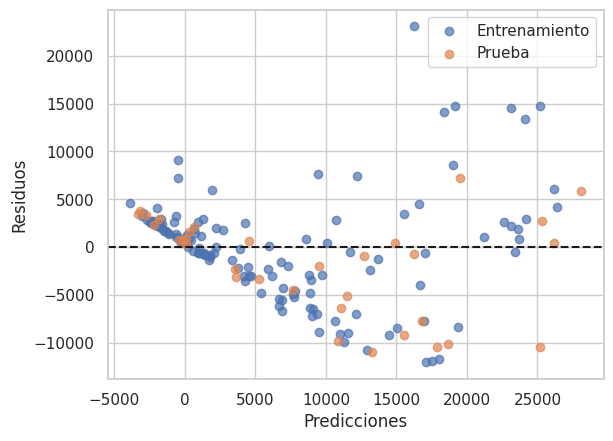

In [710]:
# Diagrama de dispersión (Scatter Plot)
plt.scatter(y_train_pred, y_train - y_train_pred, label='Entrenamiento', alpha=0.7)
plt.scatter(y_test_pred, y_test - y_test_pred, label='Prueba', alpha=0.7)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()


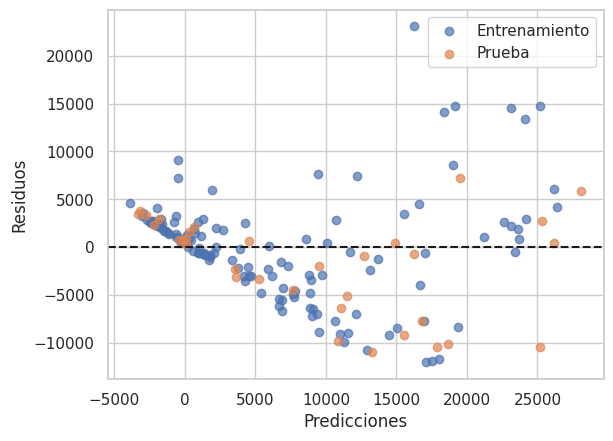

In [711]:
# Gráfico de Residuos (Residual Plot):
plt.scatter(y_train_pred, y_train - y_train_pred, label='Entrenamiento', alpha=0.7)
plt.scatter(y_test_pred, y_test - y_test_pred, label='Prueba', alpha=0.7)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.axhline(y=0, color='k', linestyle='--')
plt.legend()
plt.show()


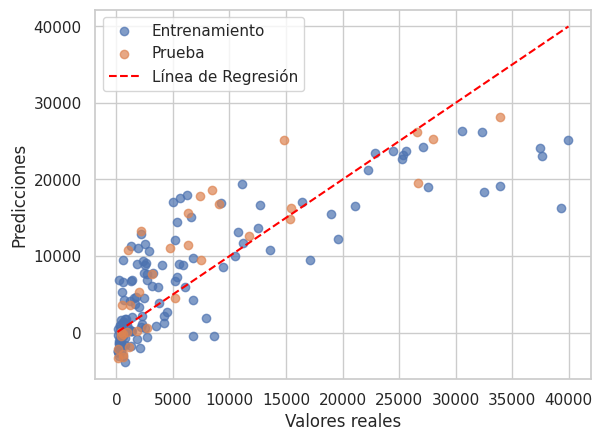

In [712]:
# Gráfico de dispersión con la línea de regresión
import matplotlib.pyplot as plt
import numpy as np

# Crear un rango de valores para la línea de regresión
x_range = np.linspace(min(y_train), max(y_train), 100)

# Graficar los datos de entrenamiento y la línea de regresión
plt.scatter(y_train, y_train_pred, label='Entrenamiento', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Prueba', alpha=0.7)
plt.plot(x_range, x_range, color='red', linestyle='--', label='Línea de Regresión')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.show()


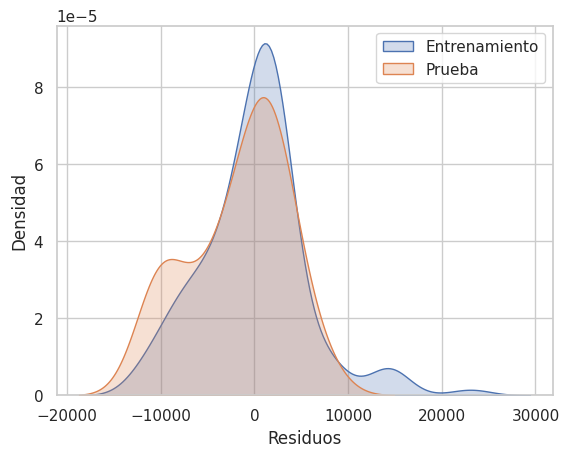

In [713]:
# Gráfico de Densidad de Residuos
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(y_train - y_train_pred, label='Entrenamiento', fill=True)
sns.kdeplot(y_test - y_test_pred, label='Prueba', fill=True)
plt.xlabel('Residuos')
plt.ylabel('Densidad')
plt.legend()
plt.show()

